# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Product Study

In [2]:
from functions_product import clean_df_product, consume_wine, consume_m_w_by_age, consume_men_women, consume_by_age
url = 'consumers.xls'
df = pd.read_excel(url)

In [3]:
df_both, df_men, df_women = clean_df_product(df)

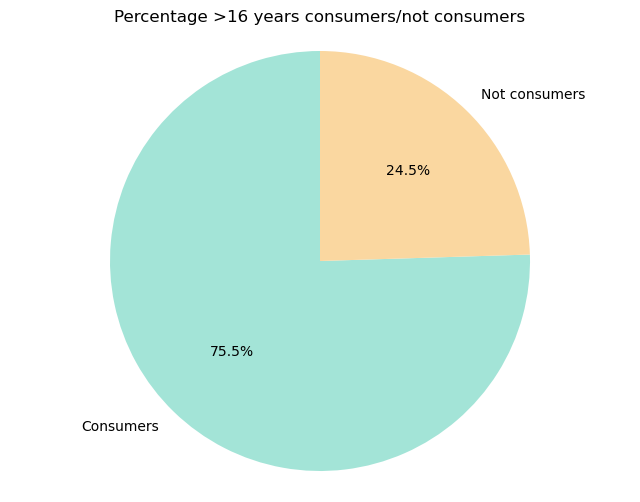

In [4]:
consume_wine(df_both)

75.49% of people over 16 years consume wine, indicating a large majority.
24.51% do not consume wine, representing a much smaller minority.
This suggests that wine consumption is quite popular among those over 16, with only a quarter choosing not to drink it.

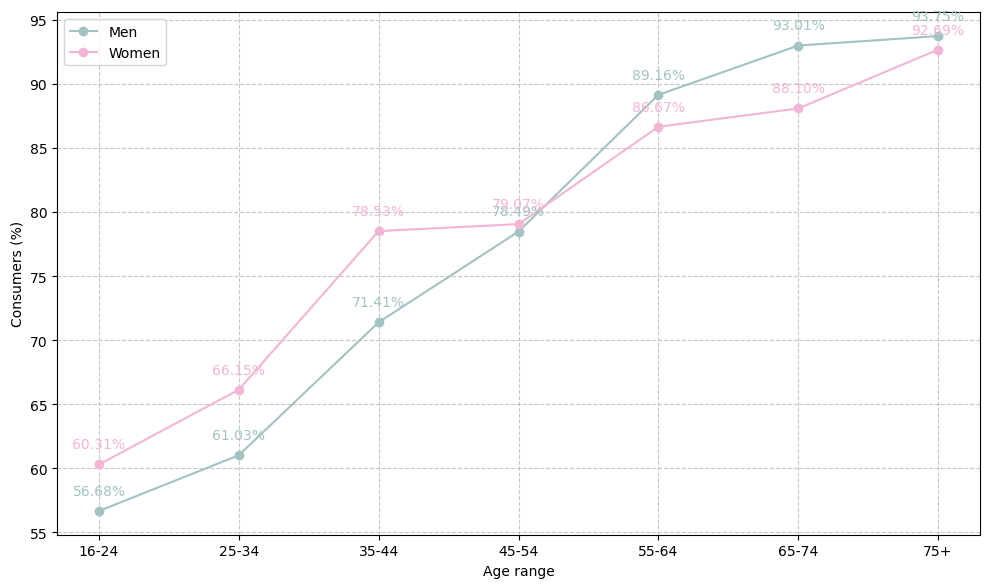

In [5]:
consume_m_w_by_age(df_men, df_women)

For Men:
Consumption decreases with age, with the highest consumption rates among the 16-24 age group and the lowest among the 75+ age group.
The 45-54 and 35-44 age groups show notable drops in consumption, with 78.49% and 71.41% total consumption, respectively.
Older age groups (55+) exhibit very low consumption rates, with only 6.25% for 75+.

For Women:
Consumption also decreases with age, similar to men, but the decline is somewhat less pronounced.
The 16-24 age group has the highest consumption rate at 60.31%, while the 75+ group has the lowest at 92.69%.
The 45-54 and 35-44 age groups show high total consumption, with 79.07% and 78.53%, respectively.
Women in older age groups (55+) have slightly higher consumption rates compared to men of the same ages, with 7.32% for 75+.

Comparative Insights:
Both genders show decreasing wine consumption with age.
Men generally have lower consumption rates than women in older age groups.
Young adults (16-24) show the highest consumption rates for both genders.
The drop in consumption is more gradual for women compared to men, especially in the older age brackets.

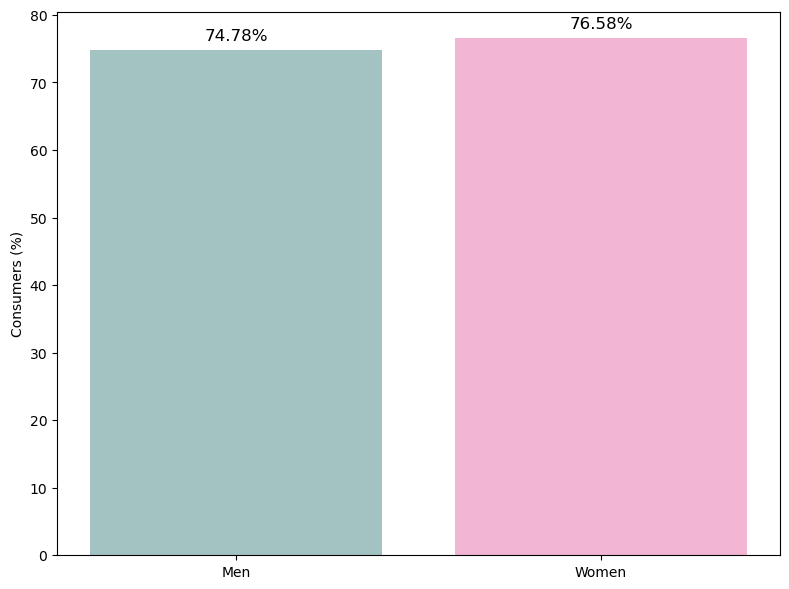

In [6]:
consume_men_women(df_men, df_women)

Women have a slightly higher overall wine consumption rate at 76.58% compared to men at 74.78%. Both genders exhibit a high rate of wine consumption, but women consistently consume wine at a marginally higher rate.

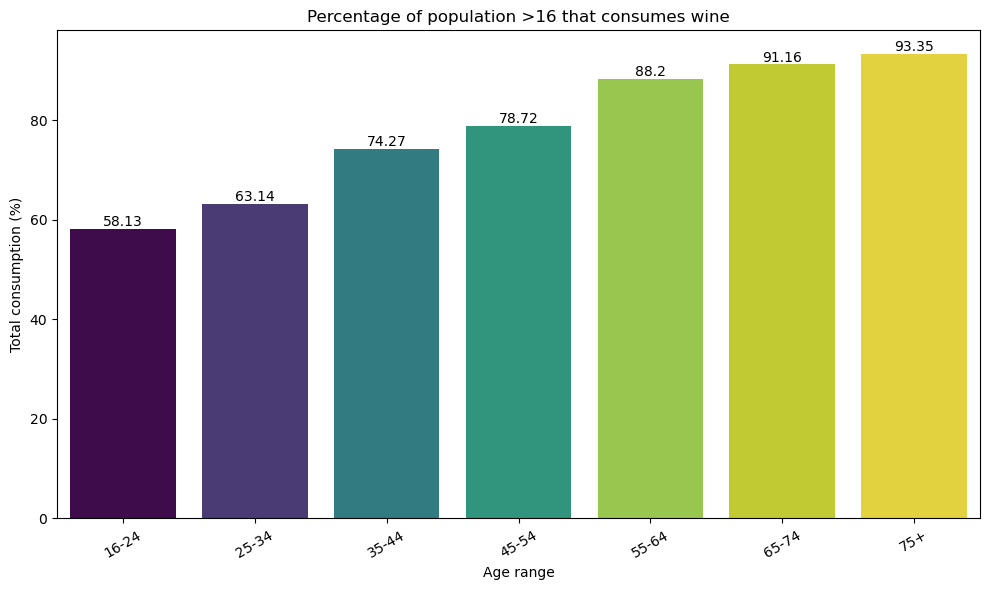

In [7]:
consume_by_age(df_both)

Young adults (16-24) consume the most wine (41.87%).
Consumption decreases with age, dropping to 6.64% in the 75+ group.
Middle-aged adults (25-54) see steady declines, while older adults (55+) have very low consumption rates.

# Marketing Study

In [8]:
from functions_marketing import clean_df_marketing, site_purchases_by_age, site_purchases_by_income, web_visits_by_age, income_by_ages, purchases_by_income, purchases_by_income_line, purchases_by_education, son_at_home, purchases_by_living_status, purchases_by_month

url = 'marketing_campaign.xlsx'
df = pd.read_excel(url)

In [9]:
df = clean_df_marketing(df)

In [10]:
df_wine = df[df['MntWines']>200]

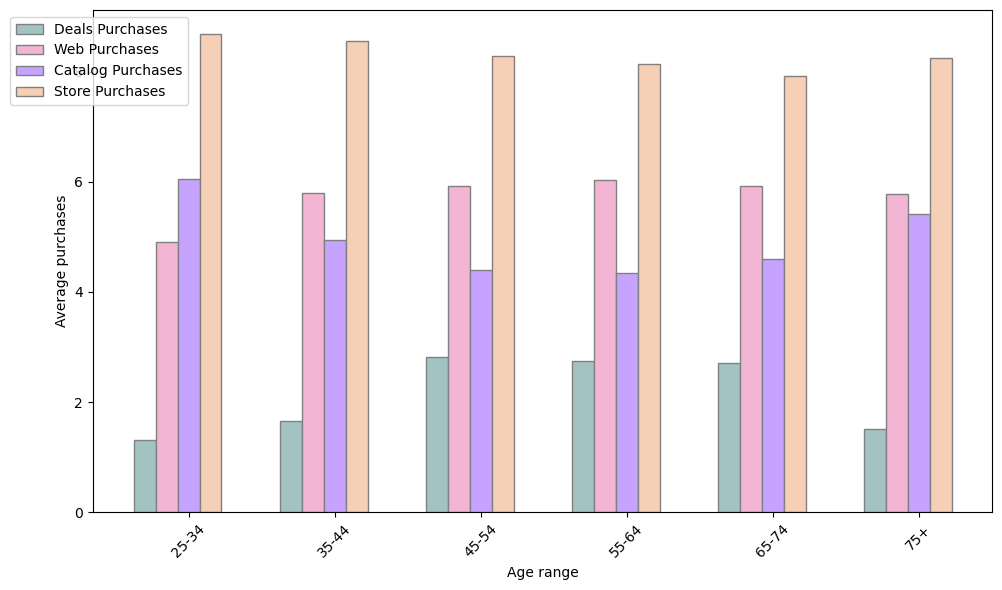

In [11]:
site_purchases_by_age(df_wine)

Younger age groups (25-34) tend to make more store and catalog purchases, but fewer deals.
Middle-aged groups (35-44 and 45-54) generally have a balanced approach with more deals and significant web purchases.
Older groups (55-64 and 65-74) show stable or high levels of store and catalog purchases, with varying levels of web purchases.
The oldest group (75+) makes fewer deals but has notable catalog and store purchases.

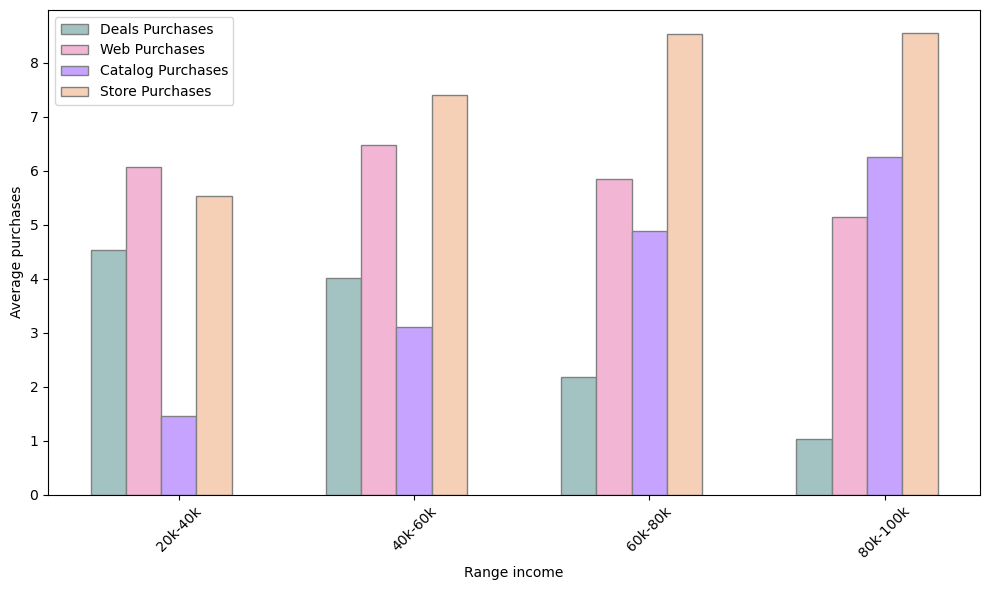

In [12]:
site_purchases_by_income(df_wine)

Lower income groups (20k-40k) make the most deals and have high web purchases, but fewer catalog purchases.
Middle income groups (40k-60k) have a balance of web and store purchases, with moderate deals and catalog purchases.
Higher income groups (60k-80k and 80k-100k) see a decline in deals and a rise in catalog purchases, with high store purchases.
Highest income group (100k-120k) makes no deals but has the highest catalog and store purchases.

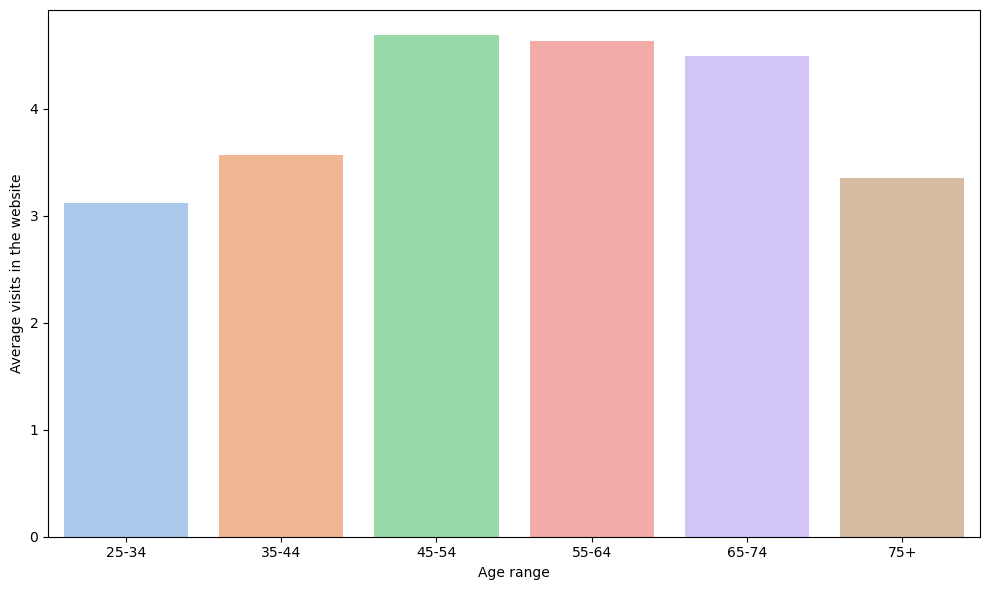

In [13]:
web_visits_by_age(df_wine)

45-54 years have the highest average monthly web visits.
55-64 years and 65-74 years also show high web visits, though slightly lower than the 45-54 age group.
35-44 years have a moderate number of web visits.
25-34 years and 75+ years have the lowest average monthly web visits.

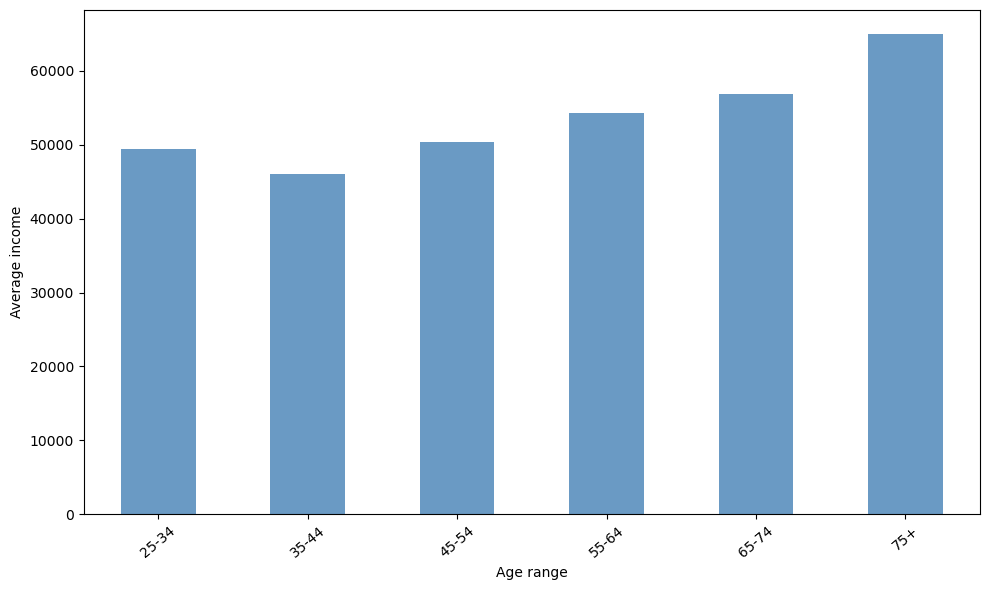

In [14]:
income_by_ages(df)

Income increases with age, peaking in the 75+ group.
25-34 years and 35-44 years have the lowest average incomes.
Income steadily rises from 45-54 years through 65-74 years.
The highest average income is in the 75+ group.

In [15]:
df_income = df[(df['Income']<110000) & (df['Income'] > 15000)]

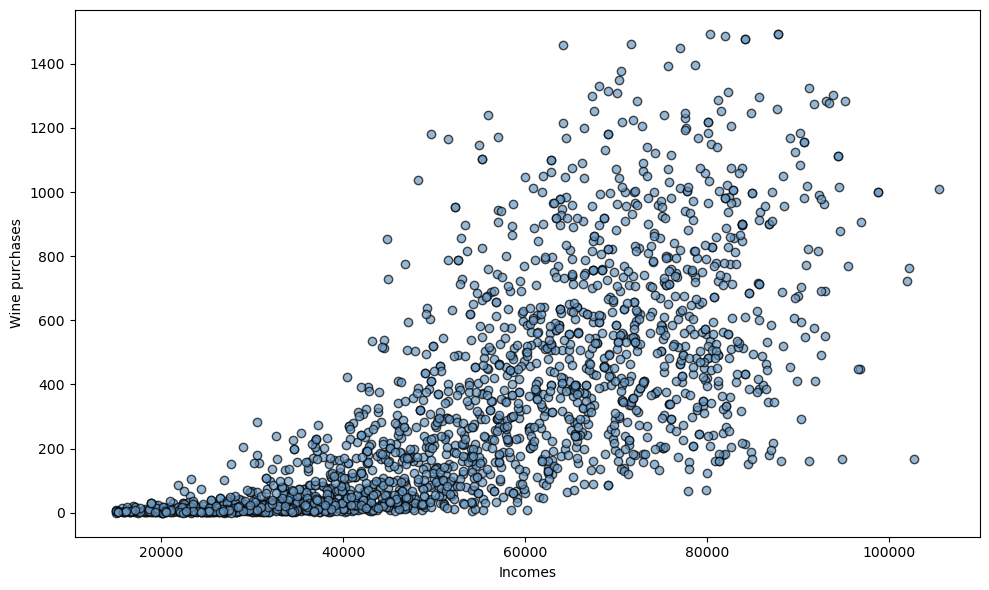

In [16]:
purchases_by_income(df_income)

Higher income leads to more wine purchases.
There's a positive correlation between income level and wine spending.
Wealthier individuals tend to spend significantly more on wine compared to lower-income groups.
As income rises, the trend of increased wine purchases becomes clearer.

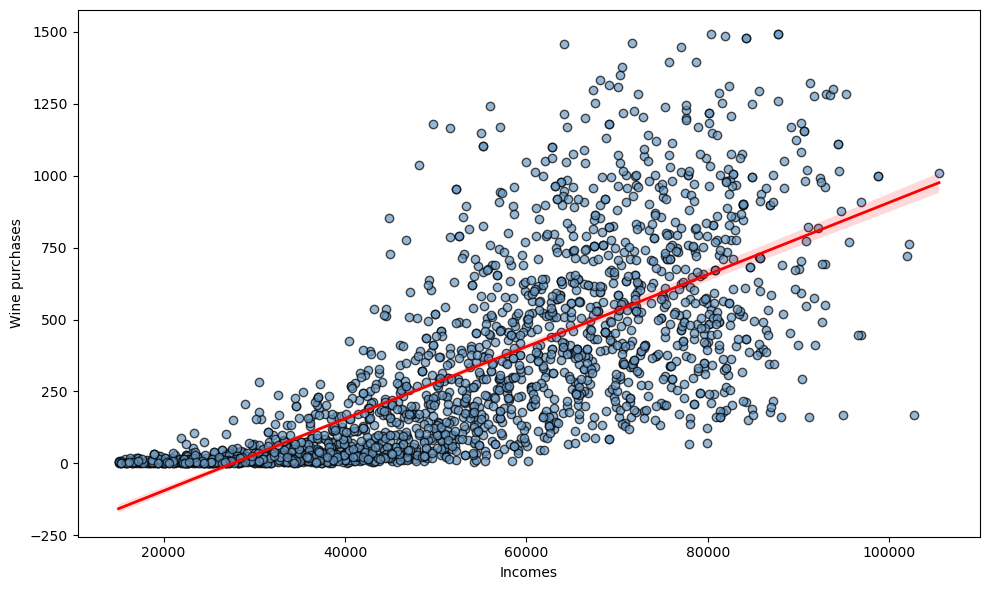

In [17]:
purchases_by_income_line(df_income)

The linear trend confirms that as income increases, wine purchases consistently rise.
The positive slope of the line indicates a clear relationship: higher income leads to more wine bought.
This reinforces the conclusion that wealthier individuals tend to spend more on wine.
The line demonstrates a predictable pattern of increasing wine consumption with rising income.

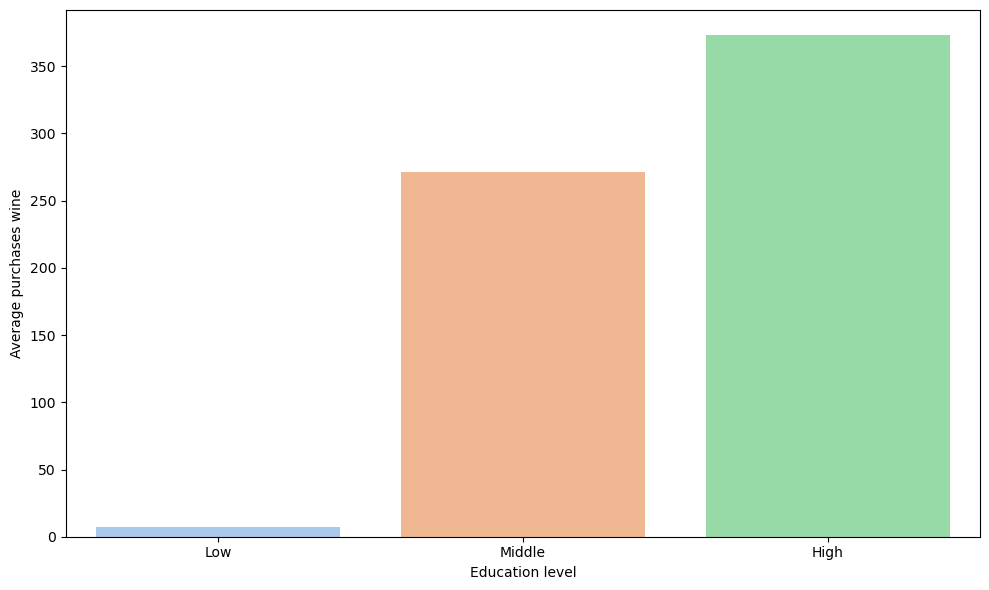

In [18]:
purchases_by_education(df)

Higher education levels correspond to greater wine purchases.
Individuals with a high education level spend the most on wine, followed by those with a middle education level.
Those with a low education level spend the least on wine, with a significant gap compared to the other groups.

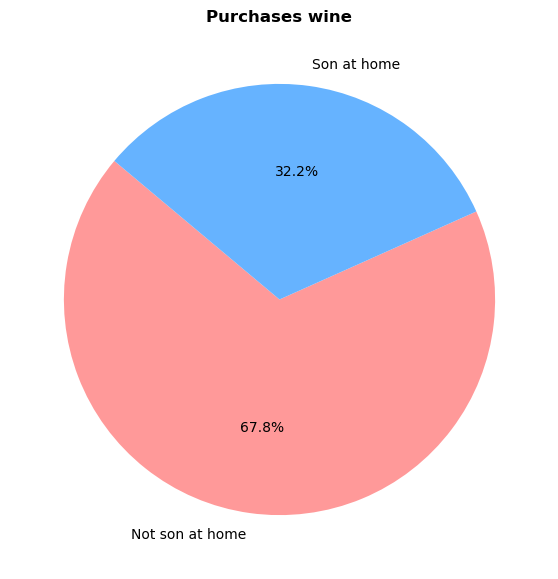

In [19]:
son_at_home(df)

Parents without children at home spend significantly more on wine compared to those with children at home.
Parents with children at home tend to spend much less on wine, likely due to different priorities or lifestyle factors.

## REVISAR! ESTA MAL

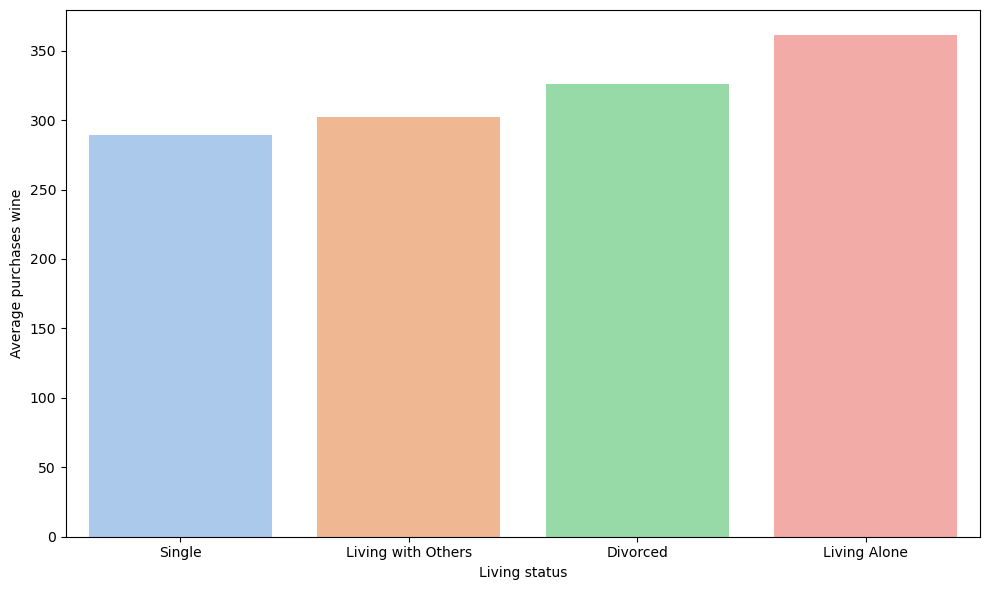

In [20]:
purchases_by_living_status(df)

Individuals living alone spend the most on wine.
Divorced individuals also have relatively high wine spending.
Those living with others or who are single spend slightly less, with singles having the lowest wine expenditures.

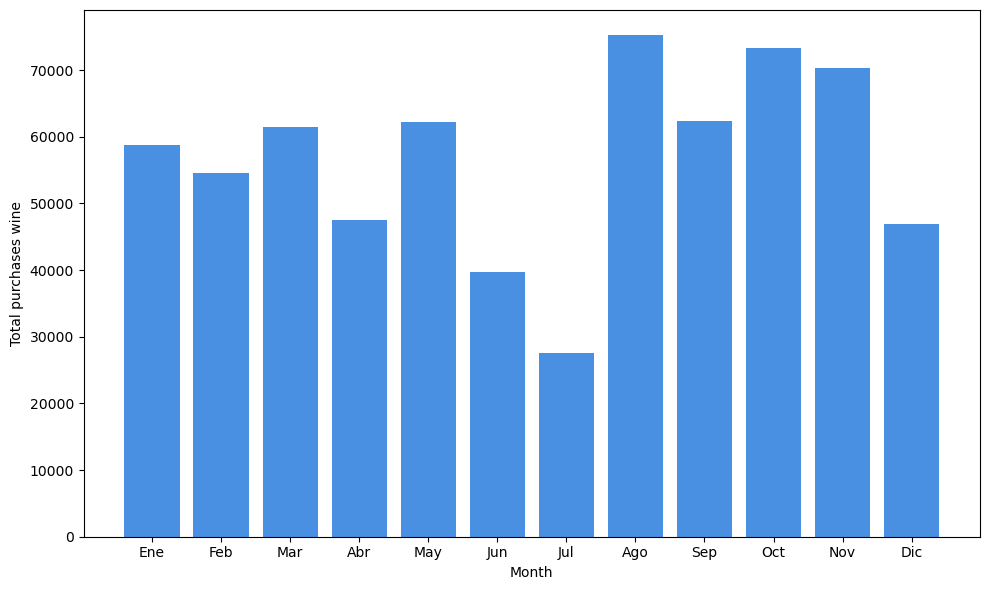

In [21]:
purchases_by_month(df)

August has the highest sales, followed closely by October and September.
Summer months (July and June) show the lowest sales, especially in July.
Sales tend to increase sharply towards the end of the year, particularly in October and November, before dipping in December.
March, May, and September also see strong sales, while January and February have moderate sales.

# Click study

In [22]:
from functions_click import clean_click, click_by_category, click_by_category_income, click_by_category_age
url = 'adsclicking.csv'
df = pd.read_csv(url)

In [23]:
df = clean_click(df)

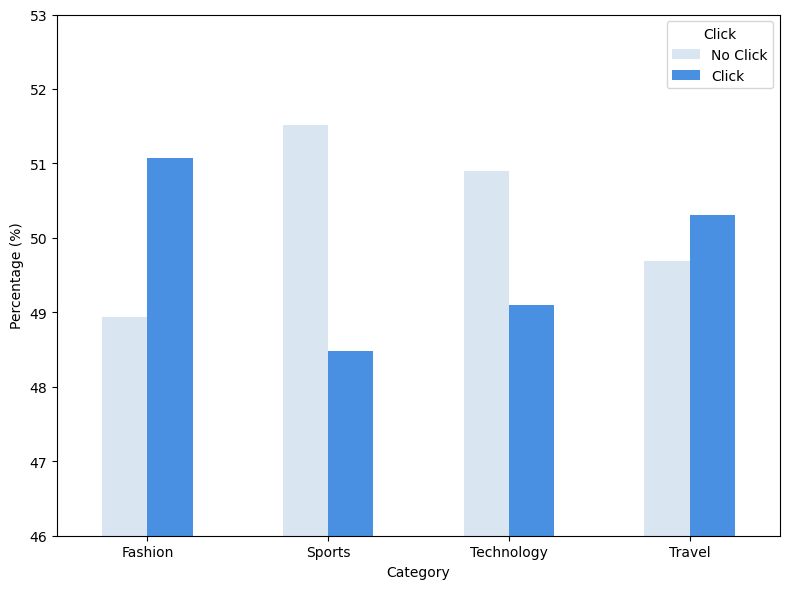

In [24]:
click_by_category(df)

Fashion:

51.07% clicked the ad, which is the highest percentage among categories.
48.93% did not click the ad.

Travel:

50.31% clicked the ad, indicating a similar level of engagement as Fashion.
49.69% did not click the ad.

Technology:

49.10% clicked the ad, slightly lower than Fashion and Travel.
50.90% did not click the ad.

Sports:

48.48% clicked the ad, the lowest percentage among the categories.
51.52% did not click the ad.

Overall Insight:

Fashion and Travel categories show the highest click-through rates.
Sports has the lowest click-through rate, suggesting less engagement with ads in this category.

C:\Users\Lidia Mayor\AppData\Local\Temp\ipykernel_24324\2566838931.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['Income_Range', 'Click']).size().unstack(fill_value=0)


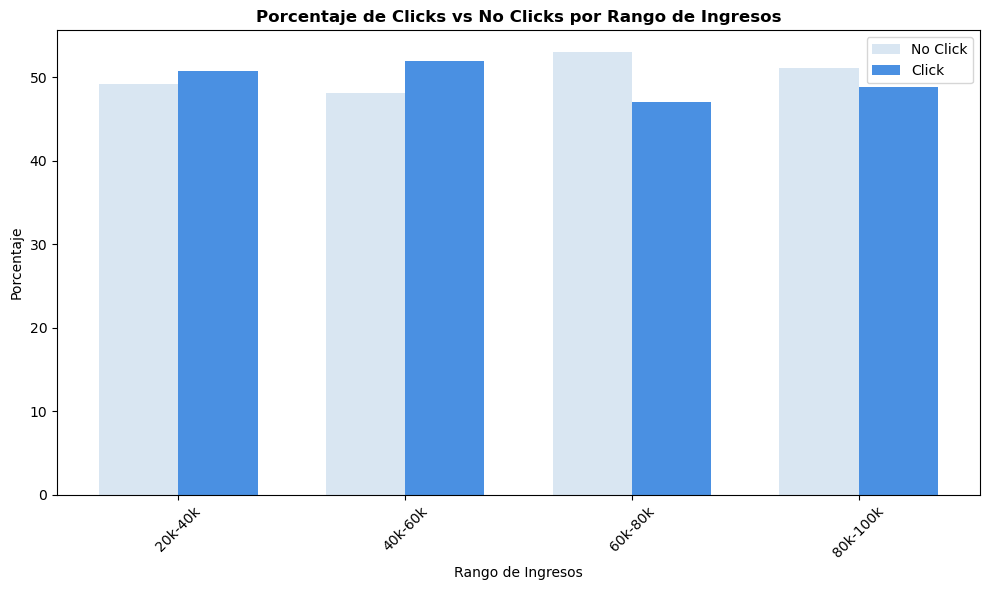

In [25]:
df_grouped = df.groupby(['Income_Range', 'Click']).size().unstack(fill_value=0)
df_grouped['Total'] = df_grouped[0] + df_grouped[1]
df_grouped['Percentage_Click'] = df_grouped[1] / df_grouped['Total'] * 100
df_grouped['Percentage_No_Click'] = df_grouped[0] / df_grouped['Total'] * 100

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(df_grouped))

plt.bar(index, df_grouped['Percentage_No_Click'], bar_width, label='No Click', color='#d9e6f2')

plt.bar(index + bar_width, df_grouped['Percentage_Click'], bar_width, label='Click', color='#4a90e2')

plt.title('Porcentaje de Clicks vs No Clicks por Rango de Ingresos', fontweight='bold')
plt.xlabel('Rango de Ingresos')
plt.ylabel('Porcentaje')

plt.xticks(index + bar_width / 2, df_grouped.index, rotation=45)

plt.legend()

plt.tight_layout()
plt.show()

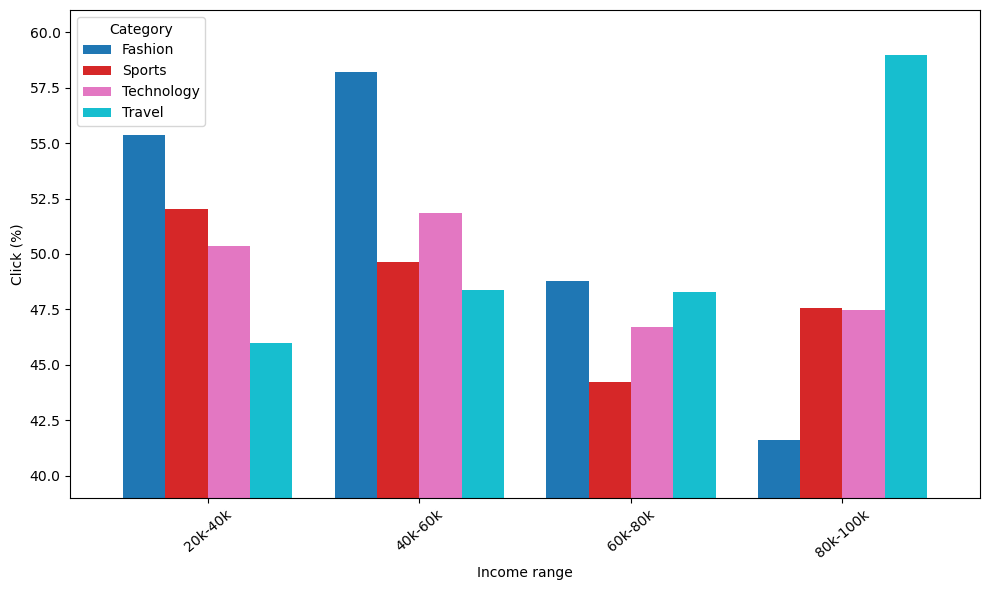

In [26]:
click_by_category_income(df)

40k-60k income range has the highest click-through rates, especially in Fashion and Technology.
80k-100k income range shows the lowest click-through rates in Fashion and Technology but high in Travel.
Fashion and Travel have variable click rates, with mid-income ranges performing best.


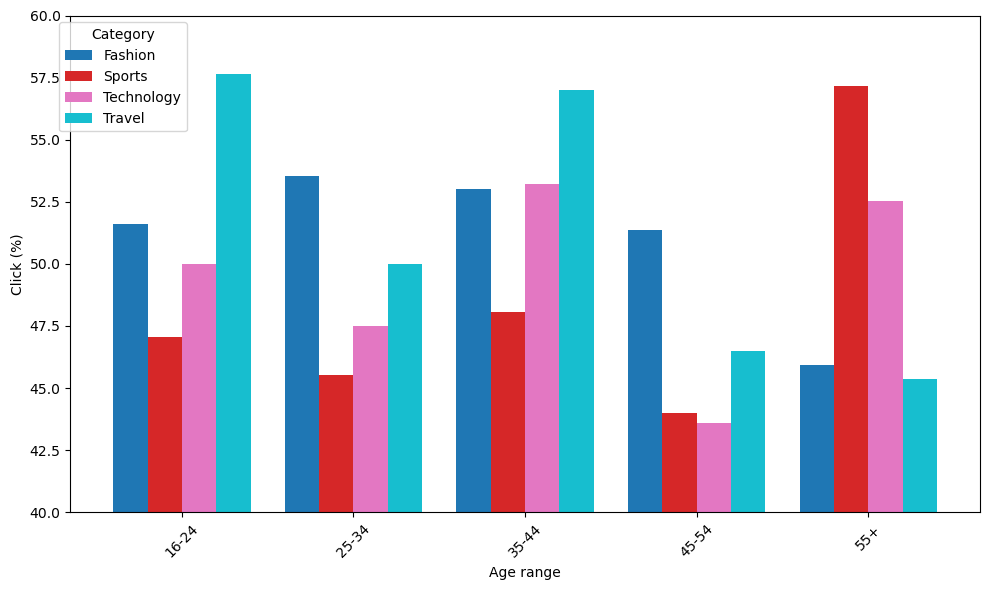

In [27]:
click_by_category_age(df)

Travel and Technology have the highest click rates among 16-24 and 35-44 age groups.
Fashion performs best among 25-34 and 45-54 age groups.
Sports shows the highest click rate in the 55+ age group.
Click rates for Technology tend to be high across most age groups.